# Laboratorio 3 - Newton Raphson y Gradiente Descendente

Amalia Carbonell - 202122079 \
Santiago Casasbuenas - 202214932

## Problema 1: Newton-Raphson en 2D para polinómios cúbicos

## Problema 2: Análisis de Extremos Locales y Globales

## Problema 3: Newton-Raphson Multidimensional

### Parte a: Función de Rosenbrock (3D)

#### 1. Calcular analíticamente el gradiente y la matriz Hessiana de f(x,y)

$$
\nabla f(x, y) = \begin{pmatrix}
\frac{\partial f}{\partial x}(x,y) \\
\frac{\partial f}{\partial y}(x,y)
\end{pmatrix}
$$

$$
H_f(x, y) = \begin{pmatrix}
\frac{\partial^2 f}{\partial x^2}(x,y) & \frac{\partial^2 f}{\partial x \partial y}(x,y) \\
\frac{\partial^2 f}{\partial y \partial x}(x,y) & \frac{\partial^2 f}{\partial y^2}(x,y)
\end{pmatrix}
$$



##### Gradiente de la función de Rosenbrock

**Derivada con respecto a $x$**
$$
\frac{\partial f}{\partial x} = 2(x-1) - 400x(y-x^2)
$$


**Derivada con respecto a $y$**
$$
\frac{\partial f}{\partial y} = 200(y-x^2)
$$


**Gradiente**
$$
\nabla f(x, y) = \begin{pmatrix}
2(x-1) - 400x(y-x^2) \\
200(y-x^2)
\end{pmatrix}
$$



##### Matriz Hessiana de la función de Rosenbrock

$$
H_f(x, y) = \begin{pmatrix}
2 - 400(y-x^2) + 800x^2 & -400x \\
-400x & 200
\end{pmatrix}
$$

#### 2. Implementación del método de Newton-Raphson para funciones bidimensionales

In [1]:
import numpy as np

# Función de Rosenbrock
def f(x, y):
    return (x - 1)**2 + 100 * (y - x**2)**2

# Gradiente de f
def grad_f(x, y):
    df_dx = 2*(x - 1) - 400*x*(y - x**2)
    df_dy = 200*(y - x**2)
    return np.array([df_dx, df_dy])

# Hessiana de f
def hessian_f(x, y):
    d2f_dx2 = 2 - 400*(y - x**2) + 800*x**2
    d2f_dxdy = -400*x
    d2f_dy2 = 200
    return np.array([
        [d2f_dx2, d2f_dxdy],
        [d2f_dxdy, d2f_dy2]
    ])

#### 3. Utilizar como punto inicial $(x_0, y_0) = (0,10)$

In [2]:
def newton_raphson_2d(f, grad_f, hessian_f, x0, y0=10, alpha=0.3, tol=1e-6, max_iter=100):
    xk = np.array([x0, y0])
    iter_history = [xk.copy()]

    for i in range(max_iter):
        grad = grad_f(xk[0], xk[1])
        hess = hessian_f(xk[0], xk[1])

        if np.linalg.cond(hess) > 1e10:
            print("Hessiana mal condicionada o singular en iteración", i)
            break

        delta = np.linalg.solve(hess, -grad)
        xk = xk + alpha * delta
        iter_history.append(xk.copy())

        if np.linalg.norm(grad) < tol:
            print(f"Convergencia alcanzada en {i+1} iteraciones.")
            break

    return xk, np.array(iter_history)


#### 4. Graficar la superficie $z=f(x,y)$ en el espacio tridimensional

Convergencia alcanzada en 85 iteraciones.


C:\Users\santi\AppData\Local\Temp\ipykernel_22516\3801410298.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


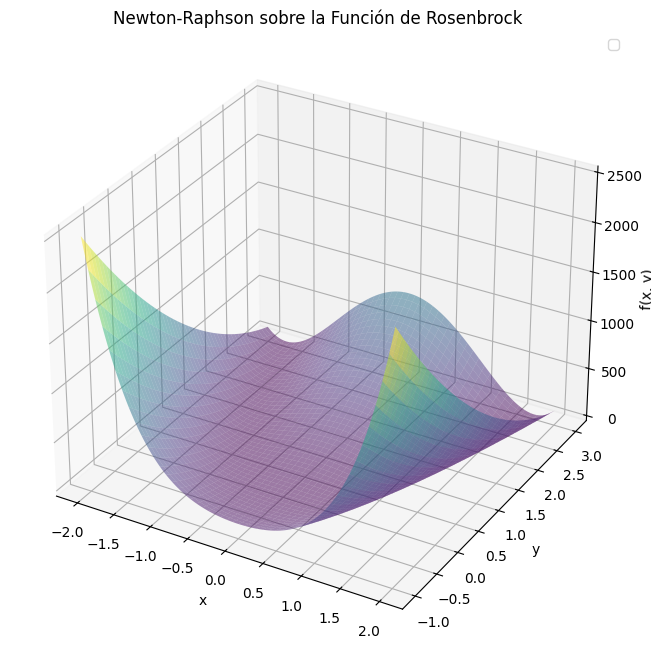

In [10]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Crear la malla para la superficie
X = np.linspace(-2, 2, 400)
Y = np.linspace(-1, 3, 400)
X, Y = np.meshgrid(X, Y)
Z = (X - 1)**2 + (100 * (Y - X**2)**2)

# Ejecutar Newton-Raphson
sol, history = newton_raphson_2d(f, grad_f, hessian_f, x0=0, y0=10, alpha=0.3)

# Graficar superficie
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.5)

# Detalles del gráfico
ax.set_title("Newton-Raphson sobre la Función de Rosenbrock")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x, y)")
ax.legend()

plt.show()


#### 5. Representar los puntos iterativos sobre la superficie y destacar el mínimo final en color rojo

Convergencia alcanzada en 85 iteraciones.


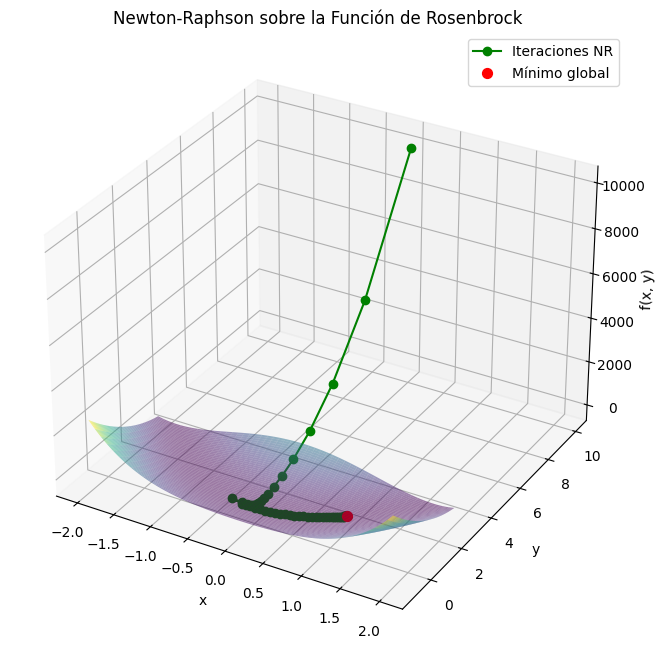

In [11]:
# Crear la malla para la superficie
X = np.linspace(-2, 2, 400)
Y = np.linspace(-1, 3, 400)
X, Y = np.meshgrid(X, Y)
Z = (X - 1)**2 + (100 * (Y - X**2)**2)

# Ejecutar Newton-Raphson
sol, history = newton_raphson_2d(f, grad_f, hessian_f, x0=0, y0=10, alpha=0.3)

# Graficar superficie
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.5)

# Extraer trayectoria
x_vals = history[:, 0]
y_vals = history[:, 1]
z_vals = f(x_vals, y_vals)

# Graficar la trayectoria
ax.plot(x_vals, y_vals, z_vals, color='green', marker='o', label='Iteraciones NR')
ax.scatter([1], [1], [f(1, 1)], color='red', s=50, label='Mínimo global')

# Detalles del gráfico
ax.set_title("Newton-Raphson sobre la Función de Rosenbrock")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x, y)")
ax.legend()

plt.show()

#### 6. Analizar la convergencia hacia el mínimo conocido de la función (1,1)
Demostrar que el método converge efectivamente hacia el punto(1,1), mínimo global de la función de Rosenbrock.

##### 1. Proximidad al mínimo
El error absoluto es menor a $10^{-6}$ respecto al mínimo teórico. Indica **alta precisión**. Además, el valor ideal de la función en el punto $(1,1)$ es 0. El valor obtenido $2.25e^{-15}$ refuerza que estamos en el fondo del valle, cerca del mínimo global.

In [5]:
print("Solución encontrada:", sol)
print("Valor de f en esa solución:", f(sol[0], sol[1]))


Solución encontrada: [0.99999996 0.99999991]
Valor de f en esa solución: 2.2478205842642123e-15


##### 2. Norma del gradiente
Siendo la norma menor a la tolerancia, es posible concluir que estamos en una zona estacionaria, donde el gradiente se anula. El método ha parado porque se ha alcanzado el criterio de convergencia.

In [6]:
print("Gradiente en el punto encontrado:", grad_f(sol[0], sol[1]))
print("Norma del gradiente:", np.linalg.norm(grad_f(sol[0], sol[1])))


Gradiente en el punto encontrado: [ 5.21684699e-07 -3.05721715e-07]
Norma del gradiente: 6.046657690644854e-07


##### 3. Hessiana definida positiva

Los autovalores de la matriz Hessiana son ambos positivos lo que nos indica que estamos en un mínimo local. Como el problema tiene solo un mínimo, este también es el mínimo global.

In [7]:
H = hessian_f(sol[0], sol[1])
eigenvals = np.linalg.eigvals(H)
print("Autovalores de la Hessiana:", eigenvals)


Autovalores de la Hessiana: [1.00160057e+03 3.99360918e-01]


## Problema 4: Gradiente Descendente en Optimización

## Problema 5: Descenso de Gradiente y Descenso de Gradiente Basado en Momento